# Ejercicio 2 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Considerando un histograma de palabras generado, excepto por el último dígito, que consideraremos $0=$ Legitimate y $1=$ spam.

Vamos hacer un data frame con la información en el archivo csv

In [2]:
data = []
with open("spam.csv",'r') as f:
    for line in f:
        data.append(line.split())
    f.close()

In [3]:
header=['w'+str(i) for i in range(len(data[0])-1)] + ['Type']
df = pd.DataFrame(data, columns=header)
df

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w1991,w1992,w1993,w1994,w1995,w1996,w1997,w1998,w1999,Type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
5168,0,0,0,0,3,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5169,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 2001 entries, w0 to Type
dtypes: object(2001)
memory usage: 79.0+ MB


### 2.1 Reporta el porcentaje de correos que están etiquetados como spam y como no spam en el conjunto de datos

In [5]:
df.groupby('Type').count().iloc[:,0]

Type
0    3672
1    1500
Name: w0, dtype: int64

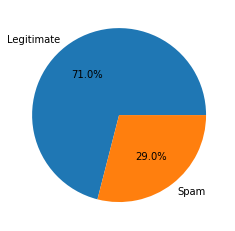

In [6]:
plt.pie(df.groupby('Type').count().iloc[:,0],labels=['Legitimate','Spam'], autopct='%1.1f%%')
plt.show()

### 2.2 Divide aleatoriamente el conjunto de datos en el 60 % para entrenamiento, el 20 % para validación y el 20 % restante para prueba usando 0 como semilla para tu generador de números aleatorios.

In [7]:
data = df.to_numpy(dtype=float)
data

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
x = data[:,:-1]
y = data[:,-1]
x_ent, x, y_ent, y = train_test_split(x,y,train_size=0.60, random_state=0)
x_val, x_pru, y_val, y_pru = train_test_split(x,y,train_size=0.50, random_state=0)

In [9]:
"Longitud de x_ent={}, x_val={}, x_pru={}".format(len(x_ent),len(x_val),len(x_pru))

'Longitud de x_ent=3103, x_val=1034, x_pru=1035'

### 2.3 Entrena 2 clasificadores bayesianos ingenuos con distintas distribuciones

Supongamos que tenemos el siguiente arreglo de entrenamiento:

$$ \displaystyle \mathbf{X} \ =\begin{bmatrix}
\mathbf{x_{0}}\\
\mathbf{x_{1}}\\
.\\
.\\
.\\
\mathbf{x}_{n}
\end{bmatrix} =\ \begin{bmatrix}
w_{0,0} & . & . & . & w_{0,m}\\
. & . &  &  & .\\
. &  & . &  & .\\
. &  &  & . & .\\
w_{n,0} & . & . & . & w_{n,m}
\end{bmatrix} \ $$ 

En donde cada vector $\mathbf{x_{i}}=[w_{i,0},...,w_{i,m}]$ contiene los atributos $w_{i,j}$ categóricos, en este caso binarios

Dados los atributos $\mathbf{x_{i}}$ se tienen las siguientes clases:
$$\displaystyle \mathbf{Y} =\ \begin{bmatrix}
c_{0}\\
.\\
.\\
.\\
c_{n}
\end{bmatrix}$$

con $c_i$ variable categórica.

#### Estimación de a priori

Asumimos que la clases se distribuyen como una Bernoulli quedando expresadas por:

$$ P(C) = q^C(1-q)^{1-C} $$

donde la estimación del parámetro $\hat{q}_C$ se reduce al conteo de frecuencia de la clase en los datos:

$$ \hat{q}_C = \frac{N_C}{N}$$

#### 2.3.1 Calsificador bayesiano ingenuo de Bernoulli

#### Estimación de verosimilitudes

Para la estimación de parámetros $\hat{q}_{i,c}$ para cada clase $c$ tenemos:
    
$$\hat{q}_{w_j,c} =\ \frac{\sum _{i}[ \ w_{i,j} \ \neq 0\ ]}{n_{c}}$$

en donde $\sum _{i}[ \ w_{i,j} \ \neq 0\ ]$ es la suma de los atributos de la $j$-ésima columna diferentes a cero y $n_c$ el número de vectores $\mathbf{x_{i}}$ que pertenecen a la clase $c$.

En cuanto a los parámetros de las clases tenemos:
$$\displaystyle \hat{q}_{c} =\ \frac{n_{c}}{n}$$

#### Clasificación de nuevos documentos

$$ P(\mathbf{x_{i}} | C ) =  \prod_{j } \hat{q}_{w_j,c}^{C}(1-\hat{q}_{w_j,c})^{1-C} P(C)$$

Calculando el logaritmo


$$ log( P(\mathbf{x_{i}} | C )) =  \sum_{j } C log(\hat{q}_{w_j,c}) + \sum_{j }(1-C)log((1-\hat{q}_{w_j,c})) + log(P(C))$$

La clase más probable es:

$$C = \operatorname*{max} \bigg\{ log( P(\mathbf{x_{i}} | C=0 )), log( P(\mathbf{x_{i}} | C=1 ))  \bigg\} $$


#### Calculo de probabilidad 

In [10]:
class BernoulliNBLog:
    def fit(self, X, y):
        """
        Estima parámetros por máxima verosimilitud
        """
        self.clases = np.unique(y)  # Nombre de las clases
        self.n_clases = self.clases.size # Número de clases
        self.n_atr = X.shape[-1] # Número de atributos (m)
        self.qa = np.zeros((self.n_clases, self.n_atr)) # Estimación de cada parametro para cada clase
        self.qc = np.zeros((self.n_clases)) # Estimación de cada clase 

        n = X.shape[0] # Número total de vectores de entrenamiento (n)
        for i,c in enumerate(self.clases):
            Xc = X[np.where(y == c)] #Atributos x_i que solo son de la clase c
            nc = Xc.shape[0] # Numero de x_i de la clase c
            self.qc[i] = nc / n # parametro para la clase
            cuentas = np.count_nonzero(Xc, axis = 0) #Suma de si el atributo aparece al menos una vez en cada x_i
            self.qa[i, :] =cuentas / nc #Parametro para atributos

    def predict_proba(self, x):
        """
        Calcula a posteriori de conjunto de datos
        """
        prop = np.zeros((x.shape[0], self.n_clases)) #Para cada vector atributo x' (nuevo), y para cada clase 
        for i in range(self.n_clases):
            a0log = np.nan_to_num((1 - x) @ np.nan_to_num(np.log(1 - self.qa[i, :])))
            a1log = np.nan_to_num(x @ np.nan_to_num(np.log(self.qa[i, :])))
            prop[:, i] = a0log + a1log + np.log(self.qc[i])

        return prop

    def predict(self, x):
        """
        Predice clase de conjunto de datos
        """
        return np.argmax(self.predict_proba(x), axis=1) #Obtener el maximo de cada vector de atributos

    def score(self, X, y):
        """
        Calcula predicciones correctas y erroneas
        """
        preds = self.predict(X)
        correc = np.sum(preds == y)
        return [correc, len(y)-correc]

In [11]:
bnbl = BernoulliNBLog()
bnbl.fit(x_ent, y_ent)

#### 2.3.2 Calsificador bayesiano ingenuo multinomial

Asumimos que los atributos de distribuyen como multinomiales:

$$ P(x|C) = \frac{n !}{\prod_{t=1}^{|V|} x_{t}!} \prod_{t=1}^{|V|} q(w_{t}|C)^{x_t} $$

Podemos ignorar el termino de normalización:

$$ P(x|C) \propto \prod_{t=1}^{|V|} q(w_{t}|C)^{x_t} $$

El estimado de cada parámetro es la frecuencia de la palabra en la clase:

$$\hat{q}(w_{t}|C) = \frac{n_C(w_t)}{\sum_{w}^{} n_C(w_t)}$$

#### Clasificación de nuevos documentos

$$ P(\mathbf{x_{i}}|C) = \prod_{t=1}^{|V|} q(w_{t}|C)^{x_t} P (C)$$


Calculando el logaritmo


$$ log( P(\mathbf{x_{i}} | C )) =  \sum_{t} x_t log(q(w_{t}|C)) + log(P(C))$$

La clase más probable es:

$$C = \operatorname*{max} \bigg\{ log( P(\mathbf{x_{i}} | C=0 )), log( P(\mathbf{x_{i}} | C=1 ))  \bigg\} $$


In [12]:
class MultinomialNBLog_Bernoulli:
    def fit(self, X, y):
        """
        Estima parámetros por máxima verosimilitud
        """
        self.clases = np.unique(y)  # Nombre de las clases
        self.n_clases = self.clases.size # Número de clases
        self.n_atr = X.shape[-1] # Número de atributos (m)
        self.qa = np.zeros((self.n_clases, self.n_atr)) # Estimación de cada parametro para cada clase
        self.qc = np.zeros((self.n_clases)) # Estimación de cada clase 

        n = X.shape[0] # Número total de vectores de entrenamiento (n)
        for i,c in enumerate(self.clases):
            Xc = X[np.where(y == c)] #Atributos x_i que solo son de la clase c
            nc = Xc.shape[0] # Numero de x_i de la clase c
            self.qc[i] = nc / n # parametro para la clase
            frecuencias = np.sum(Xc, axis = 0) #Frecuencia de cada atributo
            self.qa[i, :] = frecuencias / frecuencias.sum() #Parametro para atributos
        
        
    def predict_proba(self, x):
        """
        Calcula a posteriori de conjunto de datos
        """
        prop = np.zeros((x.shape[0], self.n_clases)) #Para cada vector atributo x' (nuevo), y para cada clase 
        for i in range(self.n_clases):
            a1log = x @ np.nan_to_num(np.log(self.qa[i, :]))
            prop[:, i] = a1log + np.log(self.qc[i])

        return prop

    def predict(self, x):
        """
        Predice clase de conjunto de datos
        """
        return np.argmax(self.predict_proba(x), axis=1) #Obtener el maximo de cada vector de atributos
    
    def score(self, X, y):
        """
        Calcula predicciones correctas y erroneas
        """
        preds = self.predict(X)
        correc = np.sum(preds == y)
        return [correc, len(y)-correc]

In [13]:
mnlb = MultinomialNBLog_Bernoulli()
mnlb.fit(x_ent, y_ent)

### 2.4 Emplea los clasificadores entrenados para predecir spam tanto en los datos de entrenamiento como en los de validación y reporta el porcentaje de predicciones correctas de cada clasificador.

<ipython-input-10-8a3806bc1e3f>:26: RuntimeWarning: divide by zero encountered in log
  a0log = np.nan_to_num((1 - x) @ np.nan_to_num(np.log(1 - self.qa[i, :])))
<ipython-input-10-8a3806bc1e3f>:26: RuntimeWarning: overflow encountered in matmul
  a0log = np.nan_to_num((1 - x) @ np.nan_to_num(np.log(1 - self.qa[i, :])))
<ipython-input-10-8a3806bc1e3f>:27: RuntimeWarning: divide by zero encountered in log
  a1log = np.nan_to_num(x @ np.nan_to_num(np.log(self.qa[i, :])))
<ipython-input-10-8a3806bc1e3f>:27: RuntimeWarning: overflow encountered in matmul
  a1log = np.nan_to_num(x @ np.nan_to_num(np.log(self.qa[i, :])))


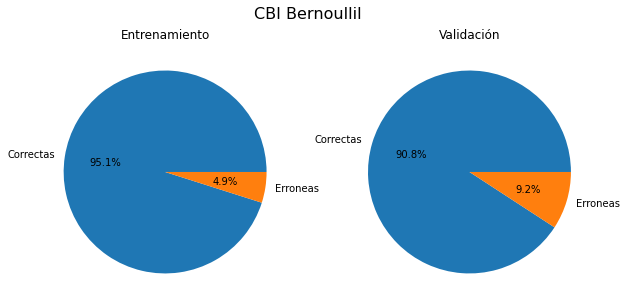

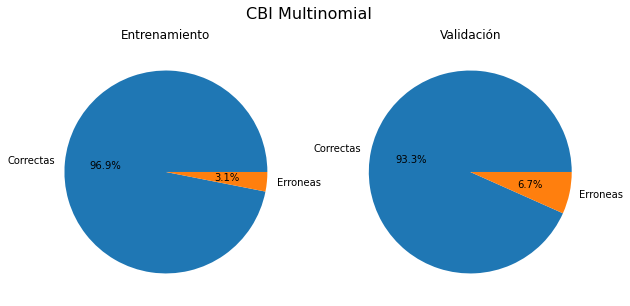

In [14]:
fig1, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,7))
fig1.suptitle('CBI Bernoullil', fontsize=16,y=0.83)
ax1.pie(bnbl.score(x_ent,y_ent),labels=['Correctas','Erroneas'], autopct='%1.1f%%')
ax1.set_title('Entrenamiento')
ax2.pie(bnbl.score(x_val,y_val),labels=['Correctas','Erroneas'], autopct='%1.1f%%')
ax2.set_title('Validación')

fig2, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,7))
fig2.suptitle('CBI Multinomial', fontsize=16,y=0.83)
ax1.pie(mnlb.score(x_ent,y_ent),labels=['Correctas','Erroneas'], autopct='%1.1f%%')
ax1.set_title('Entrenamiento')
ax2.pie(mnlb.score(x_val,y_val),labels=['Correctas','Erroneas'], autopct='%1.1f%%')
ax2.set_title('Validación')

plt.show()

### 2.5 Discute el desempeño de los diferentes clasificadores


Se utilizaron dos clasificadores, uno con una distribución de bernoulli y otro con una distribución multinomial en los atributos y bernouolli en las clases. En ambos clasificadores para el cálculo de probabilidades se utilizó el logaritmo, debido al número de instancias.
El mejor resultado lo tiene el clasificador multinomial, tanto en el conjunto de entrenamiento como en el de validación. Pues en este clasificador se consideran las frecuencias de cada una de las palabras, en cambio en el clasificador con distribución de bernoulli solo se considera si la palabra está presente o no en el correo. Lo que quiere decir que es significativo la frecuencia con la que se escribe una palabra para poder predecir si un correo es spam o legítimo. 

### 2.6 Reporta el porcentaje de predicciones correctas en el subconjunto de prueba para el clasificador con mejor rendimiento en el subconjunto de validación. 

<ipython-input-12-b8507438de1c>:27: RuntimeWarning: divide by zero encountered in log
  a1log = x @ np.nan_to_num(np.log(self.qa[i, :]))
<ipython-input-12-b8507438de1c>:27: RuntimeWarning: overflow encountered in matmul
  a1log = x @ np.nan_to_num(np.log(self.qa[i, :]))


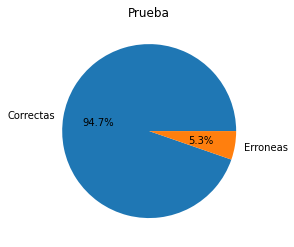

In [15]:
plt.pie(mnlb.score(x_pru,y_pru),labels=['Correctas','Erroneas'], autopct='%1.1f%%')
plt.title('Prueba')
plt.show()